# Assignment 1

## Task 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
data = np.loadtxt(open("MixCancer.csv"), delimiter=",", skiprows=1)
print (data)

[[ 0.       17.99     10.38     ...  0.44761  -2.3898    0.13107 ]
 [ 0.       20.57     17.77     ...  0.35032  -1.8265   -0.067801]
 [ 0.       19.69     21.25     ...  0.35261  -0.61448  -0.29397 ]
 ...
 [ 1.       12.47     17.31     ...  0.1053    0.3035    0.07661 ]
 [ 0.       18.49     17.52     ...  0.1663    0.251     0.09445 ]
 [ 0.       20.59     21.24     ...  0.2113    0.248     0.08999 ]]


In [2]:
#extract input and output values
x = data[:,1:]
x = preprocessing.MinMaxScaler().fit_transform(x)
y = data[:,0]
y= y.reshape(len(y),1)
print(x.shape)
print(y.shape)

(500, 30)
(500, 1)


In [3]:
# spliting data into train/test sets
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.5, random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(250, 30)
(250, 1)
(250, 30)
(250, 1)


In [4]:
#fixing seed of the random number generator, this will ensure that we always get the same result
np.random.seed(42) 

#initialising parameters
hid_neurons = 5
w1 = np.random.uniform(-1,1,[x_train.shape[1],hid_neurons]) #weights of the first layer
w2 = np.random.uniform(-1,1,[hid_neurons,1]) #weights of the second layer

#Bias set to zero 
b1 = np.zeros([1,hid_neurons]) #bias of the first layer
b2 = 0

In [5]:
#sigmoid fucntion
def sigmoid(v):
    return 1/(1+np.exp(-v))

def sigmoid_derivative(v):
    return sigmoid(v)*(1-sigmoid(v))

def reLu(v):
    return np.maximum(v,0)

def reLu_der(v):
    v[v<=0] = 0
    v[v>0] = 1
    return v

#Loss fucntion
def crossEntrop(o,y):
    return (-y*(np.log(o)) - (1-y)* np.log(1-o))

def crossEntrDeriv(o,y):
    return -(y/o - (1-y)/(1-o))

In [6]:
l = 0.5
minibatch_size = 32
epochs = 2000 

train_E = []
test_E = []
train_Acc = []
test_Acc = []

for epoch in range(epochs):
    for i in range(0, x.shape[0], minibatch_size):
        x_mini = x[i:i + minibatch_size-1,:]
        y_mini = y[i:i + minibatch_size-1,:]
        
        #feed forward
        in1 = x_mini@w1 + b1
        out1 = reLu(in1)
        in2 = out1@w2 + b2
        out2 = sigmoid(in2)


        #backpropagation Layer 2
        dE_dO2 = crossEntrDeriv(out2, y_mini)
        dO2_dIn2 = sigmoid_derivative(in2)
        dIn2_dW2 = out1
        dIn2_B2 = 1
        dE_dW2 = (1/x_mini.shape[0])*dIn2_dW2.T@(dE_dO2*dO2_dIn2)
        dE_dB2 = (1/x_mini.shape[0])*np.ones([1,len(x_mini)])@(dE_dO2*dO2_dIn2)
        
        #backpropagation Layer 1
        dIn2_dO1 = w2
        dO1_dIn1 = reLu_der(in1)
        dIn1_dW1 = x_mini
        dE_dW1 = (1/x_mini.shape[0])*dIn1_dW1.T@((dE_dO2*dO2_dIn2@dIn2_dO1.T)*dO1_dIn1)
        dE_dB1 = (1/x_mini.shape[0])*np.ones([len(x_mini)])@((dE_dO2*dO2_dIn2@dIn2_dO1.T)*dO1_dIn1)

        #updating weights and biases
        b2-=l*dE_dB2
        w2-=l*dE_dW2
        b1-=l*dE_dB1
        w1-=l*dE_dW1
    
    #error
    #error_train = 0.5*np.power((sigmoid(x@w1 + b1)-y))
    error_train = crossEntrop(out2 ,y_mini)

    #train_E.append(0.5*np.power((sigmoid(x@w1 + b1)-y),2).mean())
    error_test = crossEntrop(sigmoid(reLu(x_test@w1+b1)@w2+b2),y_test)
    test_E.append(error_test.mean())

    #accuracy
    predictions_train = np.where(out2 > 0.5, 1,0)
    prediction_test = np.where(sigmoid(reLu(x_test@w1+b1)@w2+b2) > 0.5,1,0)

    test_Acc.append(metrics.accuracy_score(y_test,prediction_test))
    train_E.append(error_train.mean())
    train_Acc.append(metrics.accuracy_score(y_mini,predictions_train))
        

C:\Users\elise\AppData\Local\Temp/ipykernel_17448/466558426.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f1.show()
C:\Users\elise\AppData\Local\Temp/ipykernel_17448/466558426.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f2.show()


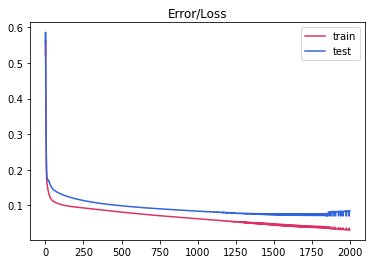

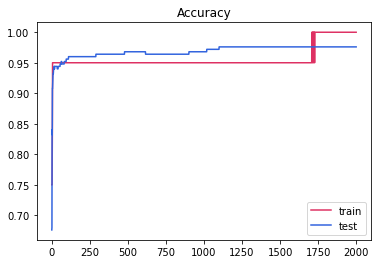

In [7]:
z=np.arange(len(train_E))
f1=plt.figure(1)
plt.plot(z,train_E,label="train",color='#DE3163')
plt.plot(z,test_E,label="test",color='#3163de')
plt.legend(loc='best')
plt.title('Error/Loss')
f1.show()

z=np.arange(len(test_E))
f2=plt.figure(2)
plt.plot(z,train_Acc,label="train",color='#DE3163')
plt.plot(z,test_Acc,label="test",color='#3163de')
plt.legend(loc='best')
plt.title('Accuracy')
f2.show()




In [8]:
print('Final Accuracy: ', metrics.accuracy_score(y_test,np.where(sigmoid(reLu(x_test@w1+b1)@w2+b2) > 0.5,1,0)))    
print('Final error/loss: ', metrics.mean_squared_error(sigmoid(reLu(x_test@w1+b1)@w2+b2),y_test))

Final Accuracy:  0.976
Final error/loss:  0.02059773814603081
